<a href="https://colab.research.google.com/github/unni2888/AIVariant_Projects/blob/main/P297_NLP_Hotel_Review_Classification_Project_(By_Unnikrishnan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import spacy
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Load the medium English language model
#nlp = spacy.load("en_core_web_md")


In [ ]:
#nlp.max_length = 15000000

In [ ]:
Hot_Rev = pd.read_excel('hotel_reviews.xlsx')

In [ ]:
Hot_Rev

,Unnamed: 0,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,NaN
20487,great location price view hotel great quick pl...,4,NaN
20488,"ok just looks nice modern outside, desk staff ...",2,NaN
20489,hotel theft ruined vacation hotel opened sept ...,1,NaN


In [ ]:
Hot_Rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20491 non-null  object 
 1   Rating      20491 non-null  int64  
 2   @           0 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 480.4+ KB


In [ ]:
Hot_Rev.describe()

,Rating,@
count,20491.000000,0.0
mean,3.952223,NaN
std,1.233030,NaN
min,1.000000,NaN
25%,3.000000,NaN
50%,4.000000,NaN
75%,5.000000,NaN
max,5.000000,NaN


# EDA
---

In [ ]:
Hot_Rev.drop('@', axis = 1, inplace = True)

In [ ]:
Hot_Rev.rename(columns = {'Unnamed: 0':'Review'}, inplace = True)

In [ ]:
Hot_Rev.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
# Function to remove stopwords using spaCy
def DOC(text):
    # Tokenize the text using spaCy
    doc = nlp(text)

    # Create a list of tokens without stopwords and lemmatize them
    tokens_without_stopwords = [token.lemma_ for token in doc if not token.is_stop]

    # Join the tokens back into a string
    filtered_text = ' '.join(tokens_without_stopwords)
    filtered_text = re.sub("[^A-Za-z0-9]+"," ",filtered_text).lower()

    return filtered_text

# Iterate through the DataFrame and apply the DOC function to the 'Review' column
for index, row in Hot_Rev.iterrows():
    text = row['Review']
    filtered_text = DOC(text)
    Hot_Rev.at[index, 'Doc_Text'] = filtered_text


In [ ]:
Hot_Rev['Doc_Text']

0        nice hotel expensive parking get good deal sta...
1        ok special charge diamond member hilton decide...
2        nice room experience hotel monaco seattle good...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay go seahawk game awesome ...
                               ...                        
20486    well keep secret rd time stay charm star beat ...
20487    great location price view hotel great quick pl...
20488    ok look nice modern outside desk staff particu...
20489    hotel theft ruin vacation hotel open sept gues...
20490    people talk believe excellent rating hotel yes...
Name: Doc_Text, Length: 20491, dtype: object

In [ ]:
Hot_Rev.head()

,Review,Rating,Doc_Text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...


In [ ]:
Hot_Rev.Review[2]

"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 6

In [ ]:
Hot_Rev.Doc_Text[2]

'nice room experience hotel monaco seattle good hotel level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegative ac unit malfunction stay desk disorganize miss separate wakeup call concierge busy hard touch provide guidance special requests tv hard use ipod sound dock suite non functioning decide book mediterranean suite night weekend stay st choice rest party fill comparison w spend night large square footage room great soak tub whirlpool jet nice shower before stay hotel arrange car service price tip reasonable driver wait arrival checkin easy downside room pick person jacuzi tub bath accessory salt bubble bath stay night get a check voucher bottle champagne nice gesture fish waiting room impression room huge open space feel room big tv far away bed chore change channel ipod dock break disappointing in morning way ask desk check thermostat say f degree warm try cover face night bright blue light keep get room night st drop desk call 

# Word Cloud

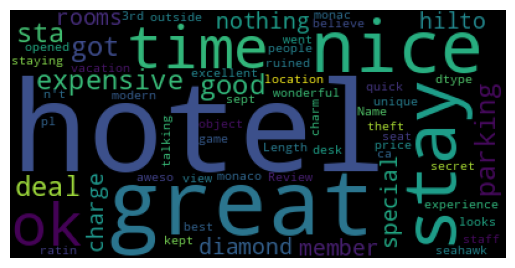

In [ ]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(str(Hot_Rev.Review))

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

# Creating Labels
---

In [ ]:
for i in range(len(Hot_Rev['Rating'])):
    if Hot_Rev['Rating'][i] > 3:
        Hot_Rev.at[i, 'Label'] = 'Pos'
    elif Hot_Rev['Rating'][i] < 3:
        Hot_Rev.at[i, 'Label'] = 'Neg'
    elif Hot_Rev['Rating'][i] == 3:
        Hot_Rev.at[i, 'Label'] = 'Neutral'

In [ ]:
Hot_Rev.head()

,Review,Rating,Doc_Text,Label
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Neg
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Pos
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Pos


## Unbalanced data

In [ ]:
Hot_Rev['Label'].value_counts()

Pos        15093
Neg         3214
Neutral     2184
Name: Label, dtype: int64

# Sentiment Analysis
---

# Vader Lexicon

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Sentiment Analysis for the whole "Hot_Rev.Review" column

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
sid.polarity_scores(Hot_Rev.loc[0]['Doc_Text'])

{'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'compound': 0.9808}

In [ ]:
Hot_Rev['scores'] = Hot_Rev['Doc_Text'].apply(lambda Doc_Text: sid.polarity_scores(Doc_Text))
Hot_Rev.head()

,Review,Rating,Doc_Text,Label,scores
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Pos,"{'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'co..."
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Neg,"{'neg': 0.051, 'neu': 0.683, 'pos': 0.266, 'co..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral,"{'neg': 0.056, 'neu': 0.687, 'pos': 0.258, 'co..."
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Pos,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Pos,"{'neg': 0.085, 'neu': 0.614, 'pos': 0.301, 'co..."


In [ ]:
Hot_Rev['compound']  = Hot_Rev['scores'].apply(lambda scores: scores['compound'])
Hot_Rev.head()

,Review,Rating,Doc_Text,Label,scores,compound
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Pos,"{'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'co...",0.9808
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Neg,"{'neg': 0.051, 'neu': 0.683, 'pos': 0.266, 'co...",0.9955
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral,"{'neg': 0.056, 'neu': 0.687, 'pos': 0.258, 'co...",0.9938
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Pos,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.9949
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Pos,"{'neg': 0.085, 'neu': 0.614, 'pos': 0.301, 'co...",0.9938


In [ ]:
Hot_Rev['scores'][0]['compound']

0.9808

In [ ]:
Hot_Rev['comp_score'] = Hot_Rev['compound'].apply(lambda c: 'Pos' if c > 0 else('Neg' if c < 0 else 'Neutral'))

In [ ]:
Hot_Rev.head()

,Review,Rating,Doc_Text,Label,scores,compound,comp_score
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,Pos,"{'neg': 0.055, 'neu': 0.624, 'pos': 0.321, 'co...",0.9808,Pos
1,ok nothing special charge diamond member hilto...,2,ok special charge diamond member hilton decide...,Neg,"{'neg': 0.051, 'neu': 0.683, 'pos': 0.266, 'co...",0.9955,Pos
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,Neutral,"{'neg': 0.056, 'neu': 0.687, 'pos': 0.258, 'co...",0.9938,Pos
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,Pos,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.9949,Pos
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Pos,"{'neg': 0.085, 'neu': 0.614, 'pos': 0.301, 'co...",0.9938,Pos


In [ ]:
Hot_Rev['comp_score'].value_counts()

Pos        19451
Neg         1021
Neutral       19
Name: comp_score, dtype: int64

## Accuracy

In [ ]:
accuracy_score(Hot_Rev['Label'],Hot_Rev['comp_score'])

0.7788785320384559

## Classification Report

In [ ]:
print(classification_report(Hot_Rev['Label'],Hot_Rev['comp_score']))

              precision    recall  f1-score   support

         Neg       0.89      0.28      0.43      3214
     Neutral       0.21      0.00      0.00      2184
         Pos       0.77      1.00      0.87     15093

    accuracy                           0.78     20491
   macro avg       0.63      0.43      0.44     20491
weighted avg       0.73      0.78      0.71     20491



## Confusion Matrix

|                  | Predicted A | Predicted B | Predicted C |
|------------------|-------------|-------------|-------------|
| Actual A         | True A      | False A/B   | False A/C   |
| Actual B         | False B/A   | True B      | False B/C   |
| Actual C         | False C/A   | False C/B   | True C      |

In [ ]:
print(confusion_matrix(Hot_Rev['Label'], Hot_Rev['comp_score']))

[[  912     9  2293]
 [   66     4  2114]
 [   43     6 15044]]


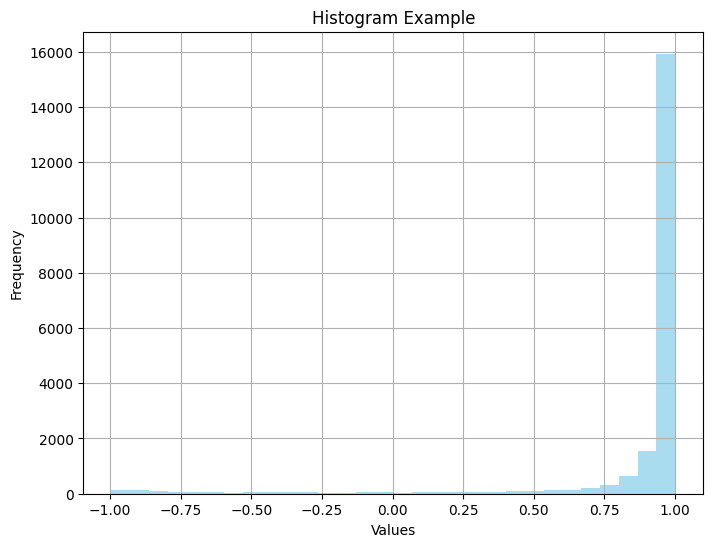

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(Hot_Rev['compound'], bins=30, color='skyblue', alpha=0.7)  # 30 bins, skyblue color, and 70% opacity (alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.grid(True)  # Add grid lines for better readability
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7baf13d40460>,
 'caps': [<matplotlib.lines.Line2D at 0x7baf13d409a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7baf13d401c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7baf13d40ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7baf13d41180>],
 'means': []}

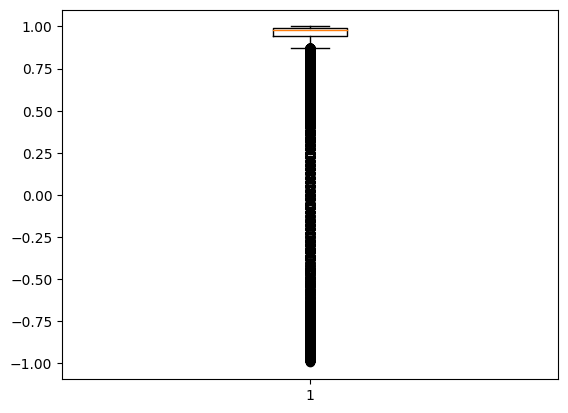

In [ ]:
plt.boxplot(Hot_Rev['compound'])

# X and y

In [ ]:
X= Hot_Rev['Doc_Text']
y= Hot_Rev['Label']

In [ ]:
X.head()

0    nice hotel expensive parking get good deal sta...
1    ok special charge diamond member hilton decide...
2    nice room experience hotel monaco seattle good...
3    unique great stay wonderful time hotel monaco ...
4    great stay great stay go seahawk game awesome ...
Name: Doc_Text, dtype: object

# Bag Of Words
  ---




## Count Vectorizer

In [ ]:
vectorizer_1 = CountVectorizer(ngram_range=(1,1))
X_BoW = vectorizer_1.fit_transform(X)
pd.DataFrame(X_BoW.toarray())

,0,1,2,3,4,5,6,7,8,9,...,43760,43761,43762,43763,43764,43765,43766,43767,43768,43769
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Bi-gram

In [ ]:
vectorizer_2 = CountVectorizer(ngram_range=(2,2))
X_BoW_2 = vectorizer_2.fit_transform(X)
print(X_BoW_2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TF-IDF
---

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(X)
pd.DataFrame(X_tfidf.toarray())
#vectorizer.vocabulary_

,0,1,2,3,4,5,6,7,8,9,...,43760,43761,43762,43763,43764,43765,43766,43767,43768,43769
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Log(IDF)
---

Log_IDF_vectorizer = TfidfVectorizer()
Log_IDF_model = Log_IDF_vectorizer.fit(X)
dictionary = dict( zip( Log_IDF_model.get_feature_names_out(), list(np.log(Log_IDF_model.idf_))))
for sent in X:
    for word in sent.split():
      if word in dictionary:
        Log_idf = dictionary.get(word)*(sent.count(word)/len(sent.split()))
        print(word+" ----> " +str(Log_idf))
      else:
        print(word + " is not in the dictionary")

# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_BoW, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13728, 43770), (6763, 43770), (13728,), (6763,))

# Model Building

# Logistic Regression

In [ ]:
LogReg_model = LogisticRegression()

In [ ]:
LogReg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Metrics for Train Data

In [ ]:
LogReg_train_predicted = LogReg_model.predict(X_train)

In [ ]:
LogReg_Train_Accuracy = accuracy_score(y_train, LogReg_train_predicted)
LogReg_Train_Accuracy

0.9951194638694638

In [ ]:
confusion_matrix(y_train, LogReg_train_predicted)

array([[ 2154,     1,     6],
       [    3,  1420,    51],
       [    2,     4, 10087]])

In [ ]:
print(classification_report(y_train, LogReg_train_predicted))

              precision    recall  f1-score   support

         Neg       1.00      1.00      1.00      2161
     Neutral       1.00      0.96      0.98      1474
         Pos       0.99      1.00      1.00     10093

    accuracy                           1.00     13728
   macro avg       1.00      0.99      0.99     13728
weighted avg       1.00      1.00      1.00     13728



## Metrics for Test Data

In [ ]:
LogReg_test_predicted = LogReg_model.predict(X_test)

In [ ]:
LogReg_Test_Accuracy = accuracy_score(y_test, LogReg_test_predicted)
LogReg_Test_Accuracy

0.8339494307260091

In [ ]:
confusion_matrix(y_test, LogReg_test_predicted)

array([[ 752,  151,  150],
       [ 150,  230,  330],
       [  91,  251, 4658]])

In [ ]:
print(classification_report(y_test, LogReg_test_predicted))

              precision    recall  f1-score   support

         Neg       0.76      0.71      0.74      1053
     Neutral       0.36      0.32      0.34       710
         Pos       0.91      0.93      0.92      5000

    accuracy                           0.83      6763
   macro avg       0.68      0.66      0.67      6763
weighted avg       0.83      0.83      0.83      6763



# SVM

In [ ]:
SVM_model = SVC(C = 1, gamma = 1, kernel = 'rbf')

In [ ]:
SVM_model.fit(X_train,y_train)

SVC(C=1, gamma=1)

## Metrics for Train Data

In [ ]:
SVM_train_predicted = SVM_model.predict(X_train)

In [ ]:
SVM_Train_Accuracy = accuracy_score(y_train, SVM_train_predicted)
SVM_Train_Accuracy

1.0

In [ ]:
confusion_matrix(y_train, SVM_train_predicted)

array([[ 2161,     0,     0],
       [    0,  1474,     0],
       [    0,     0, 10093]])

In [ ]:
print(classification_report(y_train, SVM_train_predicted))

              precision    recall  f1-score   support

         Neg       1.00      1.00      1.00      2161
     Neutral       1.00      1.00      1.00      1474
         Pos       1.00      1.00      1.00     10093

    accuracy                           1.00     13728
   macro avg       1.00      1.00      1.00     13728
weighted avg       1.00      1.00      1.00     13728



## Metrics for Test Data

In [ ]:
SVM_test_predicted = SVM_model.predict(X_test)

In [ ]:
SVM_Test_Accuracy = accuracy_score(y_test, SVM_test_predicted)
SVM_Test_Accuracy

0.739316871211001

In [ ]:
confusion_matrix(y_test, SVM_test_predicted)

array([[   0,    0, 1053],
       [   0,    0,  710],
       [   0,    0, 5000]])

In [ ]:
print(classification_report(y_test, SVM_test_predicted))

              precision    recall  f1-score   support

         Neg       0.00      0.00      0.00      1053
     Neutral       0.00      0.00      0.00       710
         Pos       0.74      1.00      0.85      5000

    accuracy                           0.74      6763
   macro avg       0.25      0.33      0.28      6763
weighted avg       0.55      0.74      0.63      6763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [ ]:
DTC = DecisionTreeClassifier(max_depth = 8, criterion = 'entropy', max_leaf_nodes= 10)

In [ ]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10)

## Metrics for Train Data

In [ ]:
DTC_train_predicted = DTC.predict(X_train)

In [ ]:
DTC_Train_Accuracy = accuracy_score(y_train, DTC_train_predicted)
DTC_Train_Accuracy

0.7709790209790209

In [ ]:
confusion_matrix(y_train, DTC_train_predicted)

array([[ 874,    0, 1287],
       [ 225,    0, 1249],
       [ 383,    0, 9710]])

In [ ]:
print(classification_report(y_train, DTC_train_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         Neg       0.59      0.40      0.48      2161
     Neutral       0.00      0.00      0.00      1474
         Pos       0.79      0.96      0.87     10093

    accuracy                           0.77     13728
   macro avg       0.46      0.46      0.45     13728
weighted avg       0.68      0.77      0.71     13728



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Predicting for Test data

In [ ]:
DTC_test_predicted = DTC.predict(X_test)

## Metrics for Test Data

In [ ]:
DTC_Test_Accuracy = accuracy_score(y_test, DTC_test_predicted)
DTC_Test_Accuracy

0.7674109123170191

In [ ]:
confusion_matrix(y_test, DTC_test_predicted)

array([[ 396,    0,  657],
       [ 116,    0,  594],
       [ 206,    0, 4794]])

In [ ]:
print(classification_report(y_test, DTC_test_predicted))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         Neg       0.55      0.38      0.45      1053
     Neutral       0.00      0.00      0.00       710
         Pos       0.79      0.96      0.87      5000

    accuracy                           0.77      6763
   macro avg       0.45      0.44      0.44      6763
weighted avg       0.67      0.77      0.71      6763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ensemble Models

# Bagging Classifier (Base Model = Logistic Regression)

In [ ]:
base_model_LogReg = LogisticRegression()

In [ ]:
bagging_LogReg = BaggingClassifier(base_estimator= base_model_LogReg, n_estimators= 50)

In [ ]:
bagging_LogReg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modul

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50)

## Metrics for Train Data

In [ ]:
bagg_LogReg_train_pred = bagging_LogReg.predict(X_train)

In [ ]:
Bagging_LogReg_Train_Accuracy = accuracy_score(y_train, bagg_LogReg_train_pred)
Bagging_LogReg_Train_Accuracy

0.9902389277389277

In [ ]:
confusion_matrix(y_train, bagg_LogReg_train_pred)

array([[ 2146,     3,    12],
       [    9,  1366,    99],
       [    3,     8, 10082]])

In [ ]:
print(classification_report(y_train, bagg_LogReg_train_pred))

              precision    recall  f1-score   support

         Neg       0.99      0.99      0.99      2161
     Neutral       0.99      0.93      0.96      1474
         Pos       0.99      1.00      0.99     10093

    accuracy                           0.99     13728
   macro avg       0.99      0.97      0.98     13728
weighted avg       0.99      0.99      0.99     13728



## Metrics for Test Data

In [ ]:
bagg_LogReg_test_pred = bagging_LogReg.predict(X_test)

In [ ]:
Bagging_LogReg_Test_Accuracy = accuracy_score(y_test, bagg_LogReg_test_pred)
Bagging_LogReg_Test_Accuracy

0.8444477302972054

In [ ]:
confusion_matrix(y_test, bagg_LogReg_test_pred)

array([[ 767,  135,  151],
       [ 147,  217,  346],
       [  76,  197, 4727]])

In [ ]:
print(classification_report(y_test, bagg_LogReg_test_pred))

              precision    recall  f1-score   support

         Neg       0.77      0.73      0.75      1053
     Neutral       0.40      0.31      0.34       710
         Pos       0.90      0.95      0.92      5000

    accuracy                           0.84      6763
   macro avg       0.69      0.66      0.67      6763
weighted avg       0.83      0.84      0.84      6763



# Bagging Classifier (Base Model = SVM)

In [ ]:
base_model_SVC = LinearSVC()

In [ ]:
bagging_SVC = BaggingClassifier(base_estimator= base_model_SVC, n_estimators= 50)

In [ ]:
bagging_SVC.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the numb

BaggingClassifier(base_estimator=LinearSVC(), n_estimators=50)

## Metrics for Train Data

In [ ]:
bagg_SVC_train_pred = bagging_SVC.predict(X_train)

In [ ]:
Bagging_SVC_Train_Accuracy = accuracy_score(y_train, bagg_SVC_train_pred)
Bagging_SVC_Train_Accuracy

0.9996357808857809

In [ ]:
confusion_matrix(y_train, bagg_SVC_train_pred)

array([[ 2161,     0,     0],
       [    0,  1471,     3],
       [    1,     1, 10091]])

In [ ]:
print(classification_report(y_train, bagg_SVC_train_pred))

              precision    recall  f1-score   support

         Neg       1.00      1.00      1.00      2161
     Neutral       1.00      1.00      1.00      1474
         Pos       1.00      1.00      1.00     10093

    accuracy                           1.00     13728
   macro avg       1.00      1.00      1.00     13728
weighted avg       1.00      1.00      1.00     13728



## Metrics for Test Data

In [ ]:
bagg_SVC_test_pred = bagging_SVC.predict(X_test)

In [ ]:
Bagging_SVC_Test_Accuracy = accuracy_score(y_test, bagg_SVC_test_pred)
Bagging_SVC_Test_Accuracy

0.8383853319532751

In [ ]:
confusion_matrix(y_test, bagg_SVC_test_pred)

array([[ 739,  144,  170],
       [ 140,  223,  347],
       [  79,  213, 4708]])

In [ ]:
print(classification_report(y_test, bagg_SVC_test_pred))

              precision    recall  f1-score   support

         Neg       0.77      0.70      0.73      1053
     Neutral       0.38      0.31      0.35       710
         Pos       0.90      0.94      0.92      5000

    accuracy                           0.84      6763
   macro avg       0.69      0.65      0.67      6763
weighted avg       0.83      0.84      0.83      6763



# Random Forest Classifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators = 50, max_depth = 12, max_features = 3)

In [ ]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, max_features=3, n_estimators=50)

## Metric for Train data

In [ ]:
RF_train_pred = RF_model.predict(X_train)

In [ ]:
RF_Train_Accuracy = accuracy_score(y_train, RF_train_pred)
RF_Train_Accuracy

0.735212703962704

In [ ]:
confusion_matrix(y_train, RF_train_pred)

array([[    0,     0,  2161],
       [    0,     0,  1474],
       [    0,     0, 10093]])

In [ ]:
print(classification_report(y_train, RF_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         Neg       0.00      0.00      0.00      2161
     Neutral       0.00      0.00      0.00      1474
         Pos       0.74      1.00      0.85     10093

    accuracy                           0.74     13728
   macro avg       0.25      0.33      0.28     13728
weighted avg       0.54      0.74      0.62     13728



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Metrics for Test Data

In [ ]:
RF_test_pred = RF_model.predict(X_test)

In [ ]:
RF_Test_Accuracy = accuracy_score(y_test, RF_test_pred)
RF_Test_Accuracy

0.739316871211001

In [ ]:
confusion_matrix(y_test, RF_test_pred)

array([[   0,    0, 1053],
       [   0,    0,  710],
       [   0,    0, 5000]])

In [ ]:
print(classification_report(y_test, RF_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         Neg       0.00      0.00      0.00      1053
     Neutral       0.00      0.00      0.00       710
         Pos       0.74      1.00      0.85      5000

    accuracy                           0.74      6763
   macro avg       0.25      0.33      0.28      6763
weighted avg       0.55      0.74      0.63      6763



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Stacking Classifier

In [ ]:
estimators = []

# Build Base Models

In [ ]:
model_1 = LogisticRegression()
estimators.append(('logreg', model_1))

In [ ]:
model_2 = SVC()
estimators.append(('SVM', model_2))

In [ ]:
model_3  = DecisionTreeClassifier(max_depth = 8)
estimators.append(('DecTree', model_3))

# Build the Ensemble

In [ ]:
Stacking_ensemble = VotingClassifier(estimators)

In [ ]:
Stacking_ensemble.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logreg', LogisticRegression()), ('SVM', SVC()),
                             ('DecTree', DecisionTreeClassifier(max_depth=8))])

## Metric for Train data

In [ ]:
stack_train_pred = Stacking_ensemble.predict(X_train)

In [ ]:
Stacking_Train_Accuracy = accuracy_score(y_train, stack_train_pred)
Stacking_Train_Accuracy

0.9315268065268065

In [ ]:
confusion_matrix(y_train, stack_train_pred)

array([[ 1995,     4,   162],
       [  136,   714,   624],
       [   11,     3, 10079]])

In [ ]:
print(classification_report(y_train, stack_train_pred))

              precision    recall  f1-score   support

         Neg       0.93      0.92      0.93      2161
     Neutral       0.99      0.48      0.65      1474
         Pos       0.93      1.00      0.96     10093

    accuracy                           0.93     13728
   macro avg       0.95      0.80      0.85     13728
weighted avg       0.93      0.93      0.92     13728



## Metrics for Test Data

In [ ]:
stack_test_pred = Stacking_ensemble.predict(X_test)

In [ ]:
Stacking_Test_Accuracy = accuracy_score(y_test, stack_test_pred)
Stacking_Test_Accuracy

0.8394203755729706

In [ ]:
confusion_matrix(y_test, stack_test_pred)

array([[ 738,   29,  286],
       [ 157,   48,  505],
       [  87,   22, 4891]])

In [ ]:
print(classification_report(y_test, stack_test_pred))

              precision    recall  f1-score   support

         Neg       0.75      0.70      0.73      1053
     Neutral       0.48      0.07      0.12       710
         Pos       0.86      0.98      0.92      5000

    accuracy                           0.84      6763
   macro avg       0.70      0.58      0.59      6763
weighted avg       0.80      0.84      0.80      6763



# Model Accuracies

In [ ]:
pd.DataFrame({'Model':['Logistic Regression','SVM','Decision Tree', 'Bagging Classifier(Log Reg)','Bagging Classifier(LinearSVC)', 'Random Forest Classifier', 'Voting Classifier'],
              'Train Accuracy':[LogReg_Train_Accuracy, SVM_Train_Accuracy, DTC_Train_Accuracy, Bagging_LogReg_Train_Accuracy,Bagging_SVC_Train_Accuracy, RF_Train_Accuracy, Stacking_Train_Accuracy],
              'Test Accuracy':[LogReg_Test_Accuracy, SVM_Test_Accuracy, DTC_Test_Accuracy, Bagging_LogReg_Test_Accuracy, Bagging_SVC_Test_Accuracy, RF_Test_Accuracy, Stacking_Test_Accuracy]})

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.995119,0.833949
1,SVM,1.000000,0.739317
2,Decision Tree,0.770979,0.767411
3,Bagging Classifier(Log Reg),0.990239,0.844448
4,Bagging Classifier(LinearSVC),0.999636,0.838385
5,Random Forest Classifier,0.735213,0.739317
6,Voting Classifier,0.931527,0.839420


# Exporting Final Model and Count Vectorizer into pickle files

In [ ]:
from pickle import dump

In [ ]:
dump(bagging_SVC, open('SVC_clsf.pkl', 'wb'))

In [ ]:
dump(vectorizer_1, open('vect.pkl','wb'))